In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
activities_data = pd.read_csv('data/activities_data.csv')
stream_data = pd.read_csv('data/coordinates_data.csv')

creating:
- marathon dataframe (every datapoint = second in marathon)
    identify marathon id
    filter
- agg dataframe by week (distance, avg speed, avg HR, #runs) --> do a subplot for all these metrics
    identify RUN id's of the last 3 months
    filter data


In [26]:
activities_data.columns

Index(['resource_state', 'athlete', 'name', 'distance', 'moving_time',
       'elapsed_time', 'total_elevation_gain', 'type', 'sport_type',
       'workout_type', 'id', 'start_date', 'start_date_local', 'timezone',
       'utc_offset', 'location_city', 'location_state', 'location_country',
       'achievement_count', 'kudos_count', 'comment_count', 'athlete_count',
       'photo_count', 'map', 'trainer', 'commute', 'manual', 'private',
       'visibility', 'flagged', 'gear_id', 'start_latlng', 'end_latlng',
       'average_speed', 'max_speed', 'average_cadence', 'average_watts',
       'max_watts', 'weighted_average_watts', 'device_watts', 'kilojoules',
       'has_heartrate', 'average_heartrate', 'max_heartrate',
       'heartrate_opt_out', 'display_hide_heartrate_option', 'elev_high',
       'elev_low', 'upload_id', 'upload_id_str', 'external_id',
       'from_accepted_tag', 'pr_count', 'total_photo_count', 'has_kudoed'],
      dtype='object')

In [27]:
activities_data["start_date"]

0      2025-10-12T08:19:05Z
1      2025-10-11T06:56:15Z
2      2025-10-08T14:35:05Z
3      2025-10-05T12:07:20Z
4      2025-10-04T09:06:36Z
               ...         
285    2023-04-07T16:21:32Z
286    2023-04-06T11:26:03Z
287    2023-04-05T13:32:47Z
288    2023-03-22T16:46:49Z
289    2020-04-15T15:49:58Z
Name: start_date, Length: 290, dtype: object

Marathon Data

In [22]:
#i have never ran a marathon before, so we can assume that the longest run activity is my marathon activity
marathon_activity = activities_data[activities_data['sport_type'] == 'Run'].sort_values('distance', ascending=False)

marathon_stream_df = stream_data[stream_data['activity_id'] == marathon_activity['id'].iloc[0]]

Aggregated Data

In [ ]:
#identify all the running activities 3 months prior the marathon, marathon was on 12 oktober


____________________________________________________________________________________________________________

what to do
- identify marathon activity
- filter stream activity --> do exploratory analysis on marathon stream data
    HR is not correct in the beginning: check other activities to calculate the ratio it normally has and maybe replace the wrong values with these new calculated
    time --> seconds after starting the activity
- create map with coordinates
- aggregate set on kilometers

In [34]:
#only select marathon data
marathon_data = stream_data[stream_data["activity_id"] == 16117253114]

#aggregate data by kilometere
marathon_data["kilometer"] = marathon_data["distance"] // 1000

grouped = marathon_data.groupby('kilometer').agg({
    'time': lambda x: x.max() - x.min(),
    'heartrate': 'mean',
    'cadence': 'mean'
    }
    )

grouped['minutes_per_km'] = (grouped['time'] / 60).round(2)

grouped['heartrate_rolling_avg'] = grouped['heartrate'].rolling(window=3).mean()


/var/folders/56/yl2z42rs7jvcv8vhtpg_gqn40000gn/T/ipykernel_85932/948748389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marathon_data["kilometer"] = marathon_data["distance"] // 1000


In [35]:
grouped

,time,heartrate,cadence,minutes_per_km,heartrate_rolling_avg
kilometer,,,,,
0.0,361,135.610497,86.011050,6.02,NaN
1.0,360,150.041551,86.047091,6.00,NaN
2.0,341,154.701754,86.678363,5.68,146.784601
3.0,335,139.773810,86.693452,5.58,148.172372
4.0,337,141.905325,86.198225,5.62,145.460296
5.0,334,139.540299,85.988060,5.57,140.406478
6.0,333,138.299401,86.272455,5.55,139.915008
7.0,328,134.656535,86.504559,5.47,137.498745
8.0,327,130.628049,86.195122,5.45,134.527995


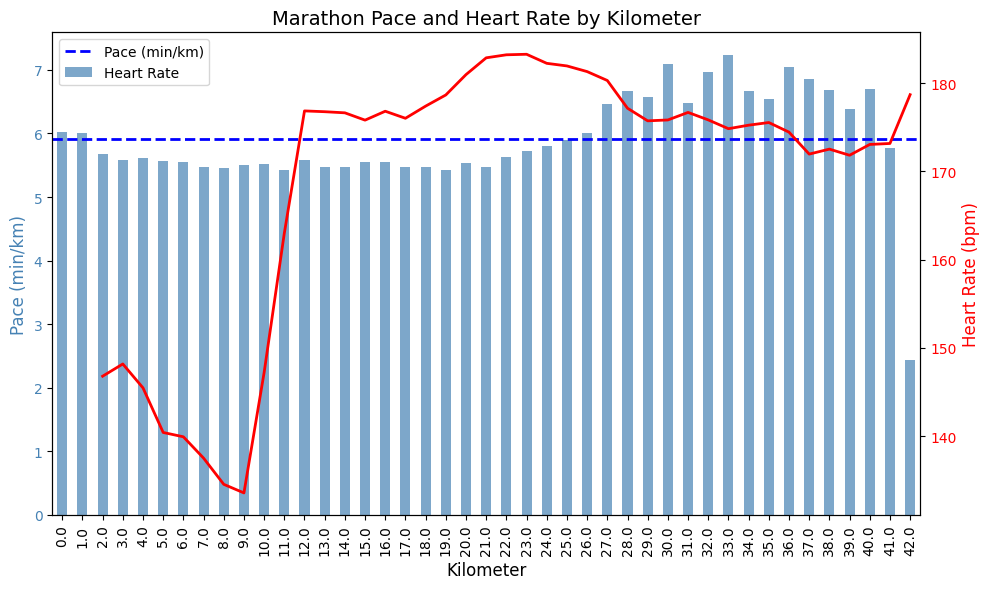

In [38]:
#import matplotlib.pyplot as plt

# Create figure and first axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart on left y-axis (pace)
grouped.plot(kind='bar', y='minutes_per_km', ax=ax1, 
             color='steelblue', alpha=0.7, legend=False)
ax1.set_ylabel('Pace (min/km)', color='steelblue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xlabel('Kilometer', fontsize=12)

avg_pace = grouped["minutes_per_km"].mean()

ax1.axhline(y=avg_pace, color='blue', linestyle='--', linewidth=2, label='Avg Pace')

# Create second y-axis
ax2 = ax1.twinx()

# Line chart on right y-axis (heart rate)
grouped.plot(y='heartrate_rolling_avg', ax=ax2, color='red', 
             #marker='o', 
             linewidth=2, markersize=8, legend=False)
ax2.set_ylabel('Heart Rate (bpm)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red')

# Title and legend
ax1.set_title('Marathon Pace and Heart Rate by Kilometer', fontsize=14)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, ['Pace (min/km)', 'Heart Rate'], loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [8]:
activities_data

,resource_state,athlete,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,workout_type,...,display_hide_heartrate_option,elev_high,elev_low,upload_id,upload_id_str,external_id,from_accepted_tag,pr_count,total_photo_count,has_kudoed
0,2,"{'id': 54565248, 'resource_state': 1}",Ochtendloop,42455.1,15197,15285,100.0,Run,Run,NaN,...,True,17.8,-0.6,17200398531,17200398531,garmin_ping_490100838456,False,7,0,False
1,2,"{'id': 54565248, 'resource_state': 1}",Ochtendloop,4044.9,1449,1459,20.0,Run,Run,NaN,...,True,18.0,1.6,17185068113,17185068113,garmin_ping_489657976905,False,0,0,False
2,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6523.6,2238,2238,7.0,Run,Run,NaN,...,True,10.0,5.2,17158262764,17158262764,garmin_ping_488717130975,False,0,0,False
3,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,16013.0,5250,5322,127.0,Run,Run,NaN,...,True,130.4,64.0,17124299627,17124299627,garmin_ping_487609760087,False,11,0,False
4,2,"{'id': 54565248, 'resource_state': 1}",Middagtraining,0.0,3784,3784,0.0,Workout,Workout,NaN,...,True,0.0,0.0,17110419535,17110419535,garmin_ping_487203451962,False,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,2,"{'id': 54565248, 'resource_state': 1}",Avondloop,7013.9,2112,2115,57.4,Run,Run,NaN,...,True,506.6,496.2,9561705392,9561705392,5ACC5A8D-E2C3-4C68-AF31-2679CFE8ED00.fit,False,6,0,False
286,2,"{'id': 54565248, 'resource_state': 1}",Namiddagzwemsessie,2000.0,2977,2977,0.0,Swim,Swim,NaN,...,True,NaN,NaN,9561705630,9561705630,BA06A7FB-B0A8-4F77-9B44-0B36F486D077.fit,False,0,0,False
287,2,"{'id': 54565248, 'resource_state': 1}",Namiddagzwemsessie,1400.0,2341,2341,0.0,Swim,Swim,NaN,...,True,NaN,NaN,9561705718,9561705718,CB7C253B-DB4B-477E-89AA-A487FFAD4DDC.fit,False,0,0,False
288,2,"{'id': 54565248, 'resource_state': 1}",Namiddagloop,6837.9,2240,2253,29.8,Run,Run,NaN,...,True,8.0,3.2,9401759287,9401759287,53270850-6858-4981-B3DD-3AA343ECB0C2.fit,False,4,0,False
